In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import random
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
data = load_iris()
dir(data)

In [ ]:
X = data.data
Y = data.target

In [ ]:
K = len(np.unique(Y))

In [ ]:
def random_centroids(X, K):
    m = X.shape[0]
    lst_pos_K = []
    lst_K = []
    while len(lst_pos_K) < K:
        i = random.randint(0, m-1)
        if i not in lst_pos_K:
            lst_pos_K.append(i)
            lst_K.append(X[i])
    return lst_K
lst_K = random_centroids(X, K)
lst_K

In [ ]:
def cluster_assignment(X, lst_K):
    lst = []
    m = X.shape[0]
    for i in range(m):
        temp = 0
        min = np.linalg.norm(X[i] - lst_K[0])
        for j, k in enumerate(lst_K):
            if np.linalg.norm(X[i] - k) < min:
                temp = j
        lst.append(temp)
    return lst
lst = cluster_assignment(X, lst_K)

In [ ]:
def move_centroid(X, lst, lst_K):
    lst1 = []
    for i, k in enumerate(lst_K):
        mu_k = np.zeros((X.shape[1]))
        count = 0
        for j, centroid in enumerate(lst):
            if centroid == i:
                mu_k += X[j]
                count += 1
        if count == 0:
            average = k
        else:
            average = mu_k / count
        lst1.append(average)
    return lst1
move_centroid(X, lst, lst_K)

In [ ]:
def compute_cost(X, lst, lst_K):
    cost = 0
    for i in range(X.shape[0]):
        for j, k in enumerate(lst_K):
            if lst[i] == j:
                cost += np.linalg.norm(X[i] - k)
    return cost/X.shape[0]
compute_cost(X, lst, lst_K)

In [89]:
def K_means(X, K, repeat_find_centroid = 1000, max_iter = 10):
    min_cost = 1000
    lst_select = []
    for i in range(max_iter):
        lst_K = random_centroids(X, K)
        for j in range(repeat_find_centroid):
            lst = cluster_assignment(X, lst_K)
            lst_K = move_centroid(X, lst, lst_K)
        if min_cost > compute_cost(X, lst, lst_K): 
            min_cost = compute_cost(X, lst, lst_K)
            lst_select = lst.copy()
    return min_cost


In [91]:
dev_x = [K_means(X, K, repeat_find_centroid = 100, max_iter = 50) for K in range(1, 8)]
dev_y = [K for K in range(1, 8)]
%matplotlib inline

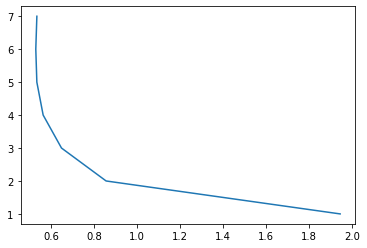

In [92]:
plt.plot(dev_x, dev_y)    #print to select K (elbow function)
plt.show()